## Step 1

- Importing the libraries
- Importing dataset
- Data Preprocessing

In [3]:
import numpy as np
import pandas as pd

data = pd.read_csv(r'C:\Users\DinAnsh\Documents\GitHub\Iris-Dataset\iris.data',
                   names = ['Sepal Length','Sepal Width','Petal Length', 'Petal Width', 'Species'])
df = pd.DataFrame(data)
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length    150 non-null float64
Sepal Width     150 non-null float64
Petal Length    150 non-null float64
Petal Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


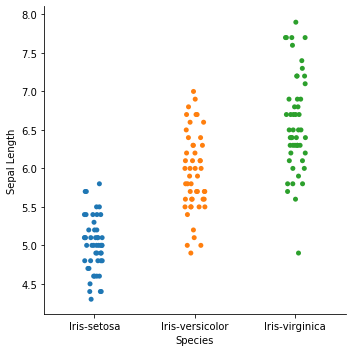

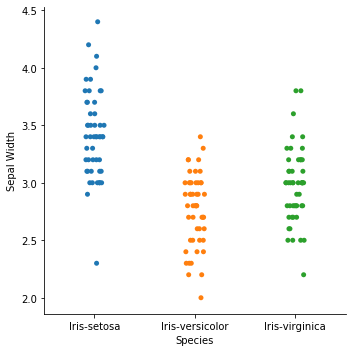

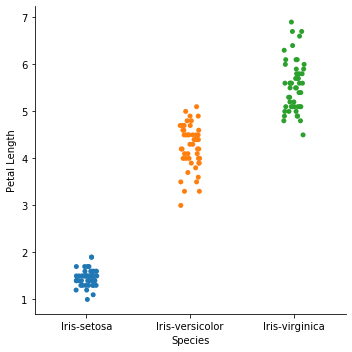

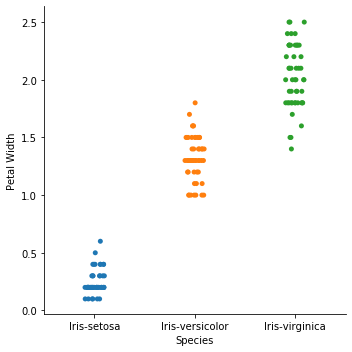

In [13]:
import seaborn as sns

for col in df.columns[:-1]:
    sns.catplot(x='Species', y=col, data = df)

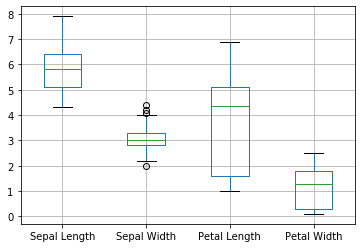

In [7]:
df.boxplot(column=df.columns.to_list()[:-1]);

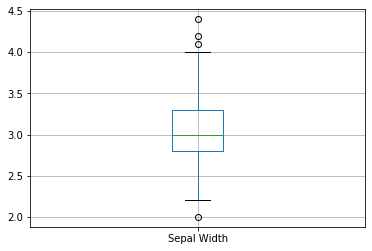

In [5]:
df.boxplot(column='Sepal Width');

In [6]:
q1, q3 = df['Sepal Width'].quantile(q=[0.25, 0.75])
IQR = q3-q1
ub = q3 + IQR*1.5
lb = q1 - IQR*1.5
df[(df['Sepal Width']<lb) & (df['Sepal Width']>ub)]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species


## Step 2

- Dealing with the categorical variable
- Classifying dependent and independent variables
- Splitting the data into a training set and test set
- Feature scaling

In [7]:
from sklearn.preprocessing import LabelEncoder

E = LabelEncoder()
encoded_data = E.fit_transform(df['Species'])
df['Species'] = encoded_data
df['Species'].unique()

array([0, 1, 2], dtype=int64)

In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
for i in [X_train, X_test, y_train, y_test]:
    print("shape : {}".format(i.shape))

shape : (112, 4)
shape : (38, 4)
shape : (112,)
shape : (38,)


In [11]:
from sklearn.preprocessing import MinMaxScaler

S = MinMaxScaler()
X_train = S.fit_transform(X_train)
X_test = S.transform(X_test)

## Step 3

- Create a KNN classifier.
- Feed the training data to the classifier
- Predicting the species for the test set
- Using the confusion matrix to calculate the accuracy score

In [12]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)

In [13]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
y_pred = clf.predict(X_test)

In [15]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
accuracy = cm.diagonal().sum()/cm.sum()
print("Accuracy by Confusion Matrix : ",accuracy)

Accuracy by Confusion Matrix :  0.9736842105263158


In [16]:
print("Classification Report : ", metrics.classification_report(y_test, y_pred))

Classification Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

